In [1]:
%matplotlib inline

import pandas as pd
import tables as tb
import tstables as tst
import numpy as np

from pylab import mpl, plt
from datetime import datetime
from data.config import GeneralConfig, load_config
from data.store import DataStore

figsize = (20, 10)

symbol = 'BTCUSDT'
tf = '5min'
# tf = None

config = GeneralConfig('E:/store/')
data = DataStore(config).load(symbol, tf)

In [2]:
ma_fast = 50
ma_slow = 200

data.drop(columns = ['open', 'high', 'low', 'volume'], inplace=True)
data['ma_fast'] = data.close.rolling(ma_fast).mean()
data['ma_slow'] = data.close.rolling(ma_slow).mean()

<AxesSubplot: title={'center': 'BTCUSDT daily | MA 50/200'}>

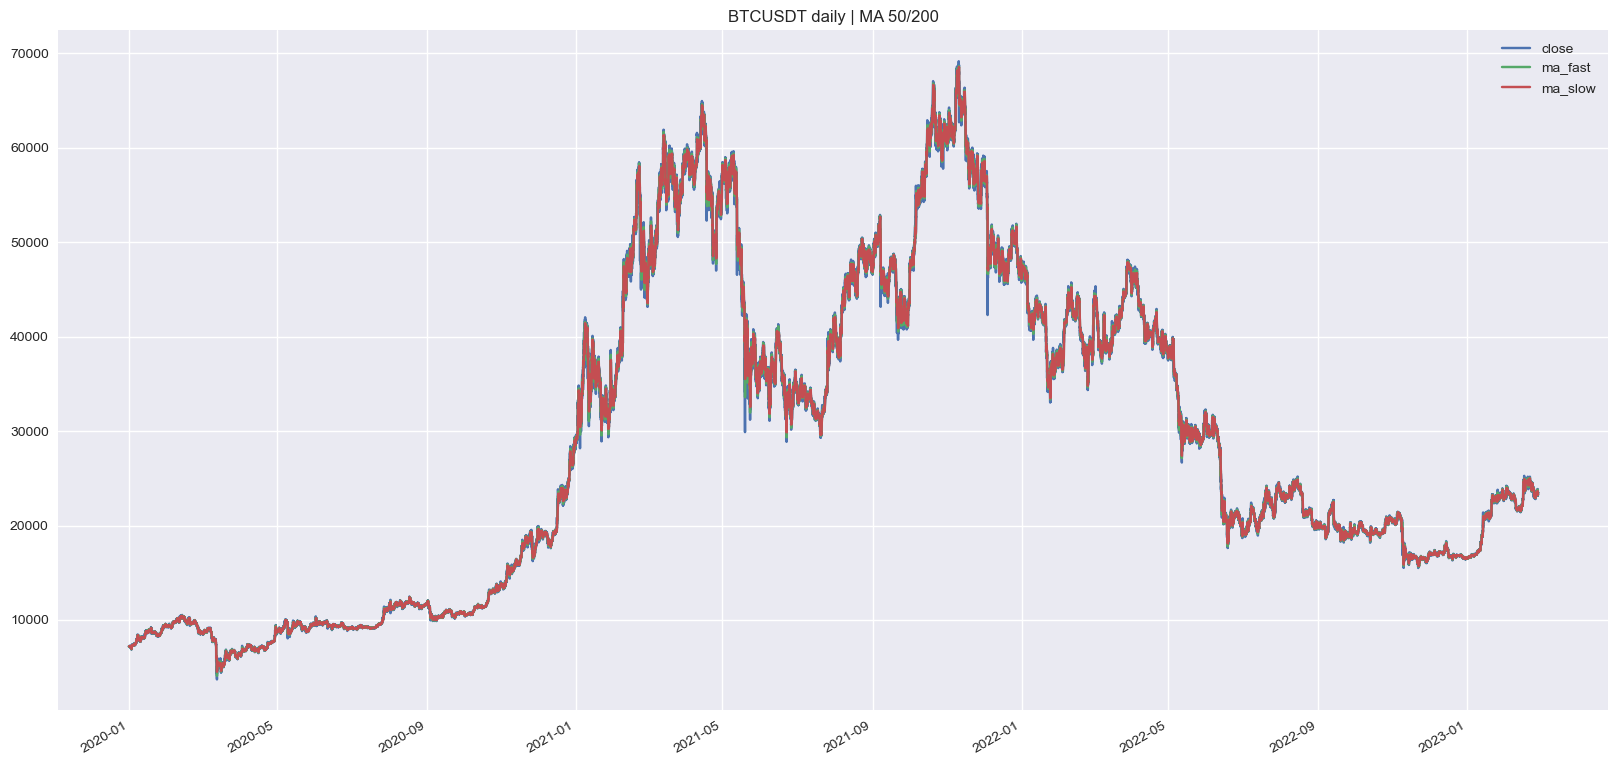

In [3]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 1000
data.plot(title='BTCUSDT daily | MA 50/200', figsize=figsize)

<AxesSubplot: title={'center': 'Market Positioning'}>

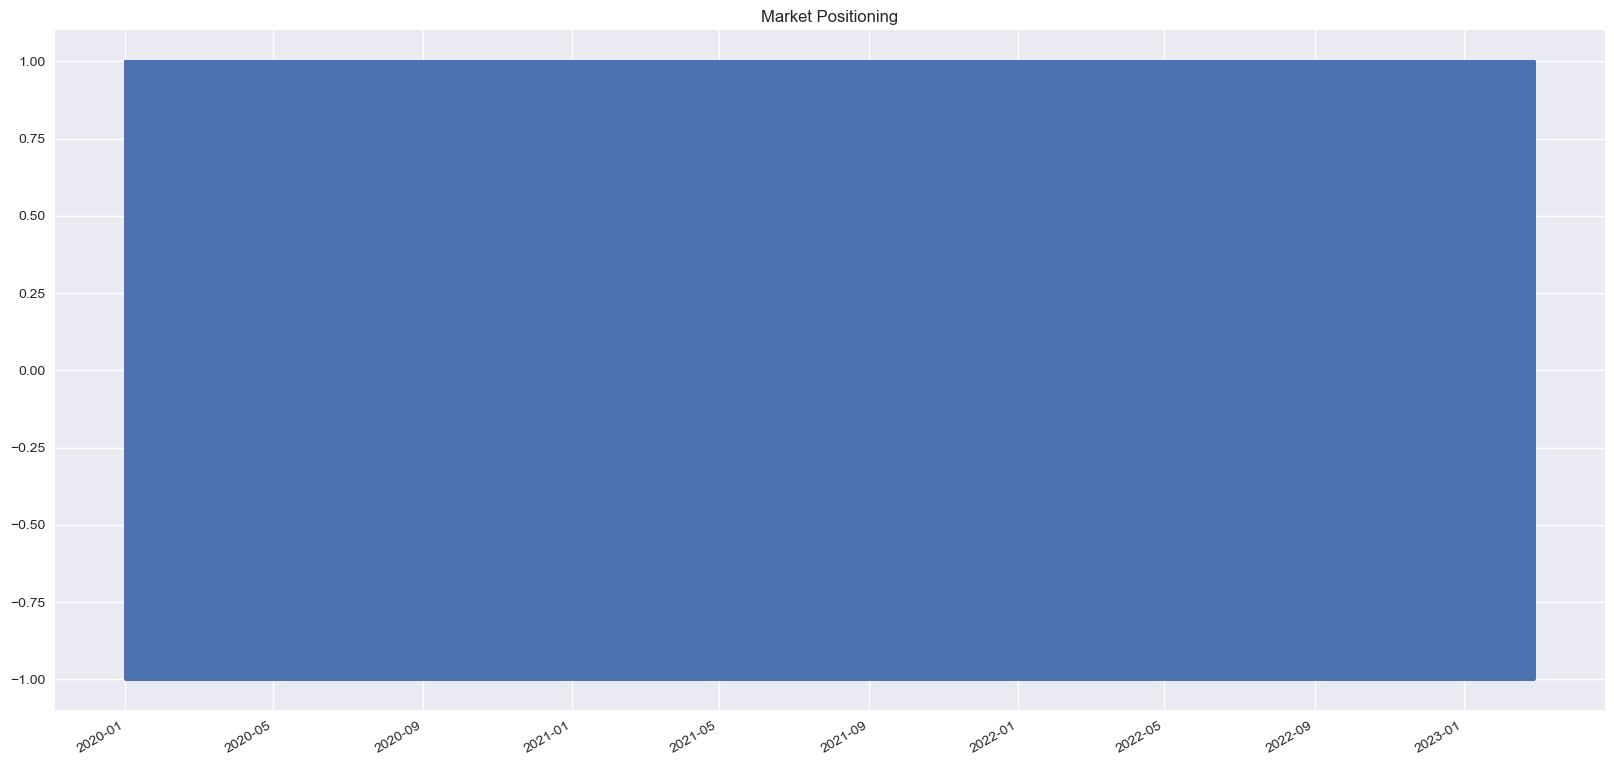

In [4]:
data['position'] = np.where(data.ma_fast > data.ma_slow, 1, -1)
data.dropna(inplace=True)

data.position.plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=figsize)

<AxesSubplot: >

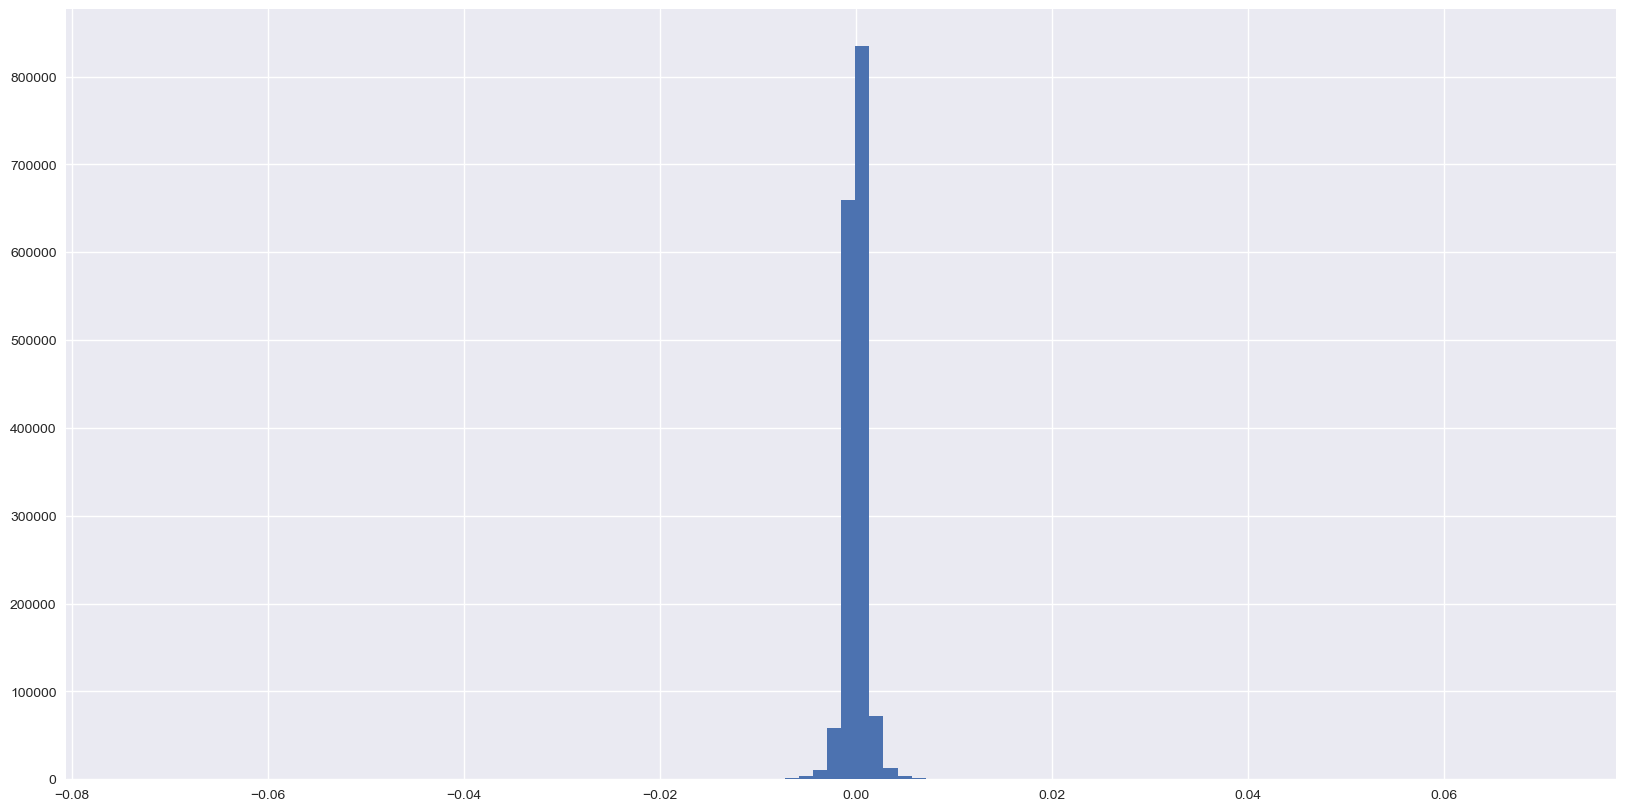

In [5]:
data['returns'] = np.log(data.close / data.close.shift(1))
data.returns.hist(bins=100, figsize=figsize)

<AxesSubplot: >

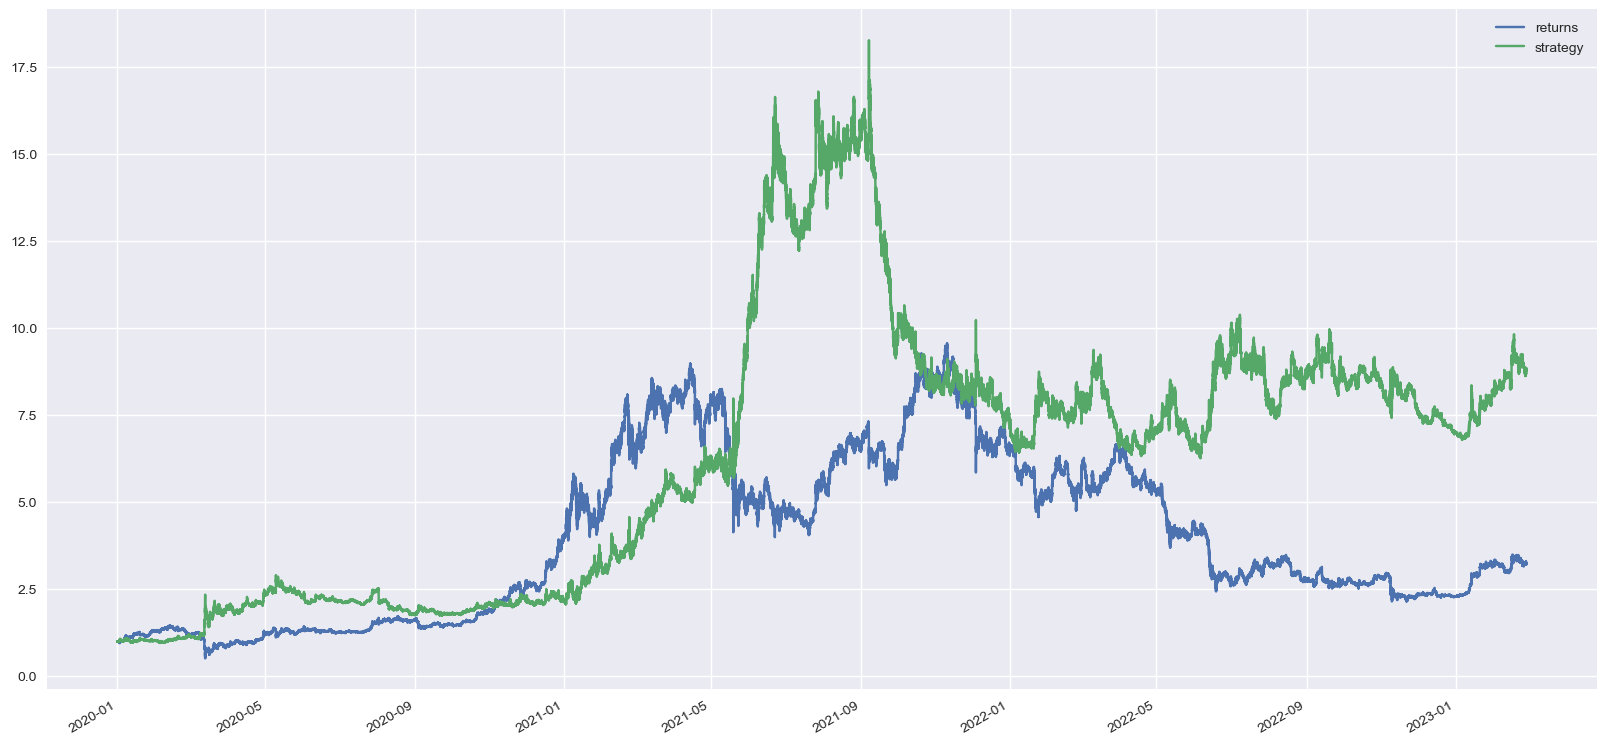

In [6]:
data['strategy'] = data.position.shift(1) * data.returns
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=figsize)